In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from vega_datasets import data

import warnings
warnings.filterwarnings('ignore')

#### San Francisco

In [2]:
df = data.sf_temps()

In [3]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
df= df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [6]:
by_day = df.asfreq('D')
by_day.head(10)

,temp
date,
2010-01-01,47.8
2010-01-02,47.9
2010-01-03,48.0
2010-01-04,48.1
2010-01-05,48.0
2010-01-06,48.1
2010-01-07,48.1
2010-01-08,48.0
2010-01-09,48.0


<AxesSubplot:xlabel='date'>

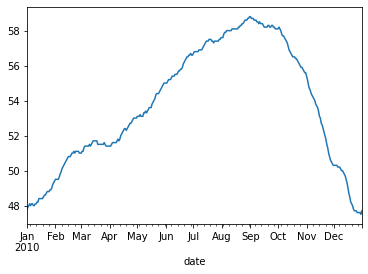

In [7]:
# temp by day
by_day['temp'].plot()

<AxesSubplot:xlabel='date'>

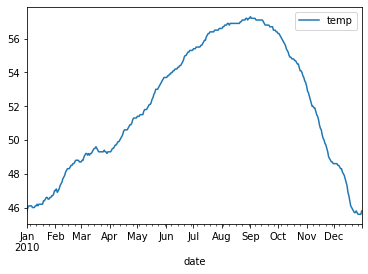

In [8]:
# minimum temp by day
df.resample('D').min().plot()

<AxesSubplot:xlabel='date'>

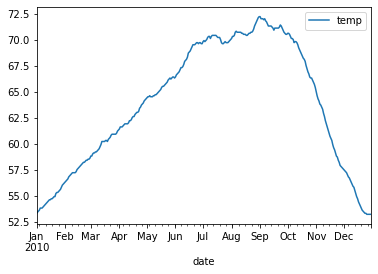

In [9]:
# max temp by day
df.resample('D').max().plot()

In [10]:
# The coldest month on average is January
monthly_averages = df.resample('M').mean()
monthly_averages.sort_values('temp')

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139
2010-04-30,55.633056
2010-05-31,57.970968
2010-10-31,60.253091
2010-06-30,60.444722


In [11]:
# The month with the highest average is September

In [12]:
# Figuring out the day with the highest variability

by_day['min_temp'] = df.resample('D').min()

by_day['max_temp'] = df.resample('D').max()

by_day['temp_change'] = by_day['max_temp'] - by_day['min_temp']
by_day.head()

,temp,min_temp,max_temp,temp_change
date,,,,
2010-01-01,47.8,45.8,53.3,7.5
2010-01-02,47.9,46.0,53.4,7.4
2010-01-03,48.0,46.1,53.5,7.4
2010-01-04,48.1,46.1,53.6,7.5
2010-01-05,48.0,46.1,53.8,7.7


In [13]:
by_day.sort_values('temp_change',ascending=False)

,temp,min_temp,max_temp,temp_change
date,,,,
2010-08-31,58.8,57.2,72.2,15.0
2010-09-01,58.8,57.3,72.2,14.9
2010-08-30,58.7,57.2,72.1,14.9
2010-08-29,58.7,57.1,71.9,14.8
2010-09-02,58.7,57.2,72.0,14.8
...,...,...,...,...
2010-12-25,47.7,45.8,53.3,7.5
2010-01-04,48.1,46.1,53.6,7.5
2010-12-31,47.7,45.8,53.2,7.4


August 31st had the greatest temp change

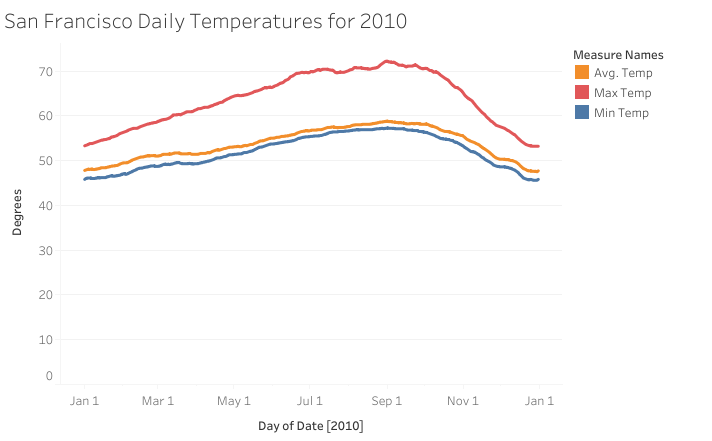

#### Seattle

In [14]:
df =  data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [16]:
date_df = df.set_index('date')
date_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [17]:
# This is not going to aggregate, this gives you the value on that day
by_month = date_df.asfreq('M')
by_month.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,1.8,9.4,6.1,3.9,rain
2012-02-29,0.8,5.0,1.1,7.0,snow
2012-03-31,13.2,10.0,2.8,3.4,rain
2012-04-30,4.3,12.8,7.2,8.0,rain
2012-05-31,3.8,17.8,12.2,2.7,rain


In [18]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [19]:
df[df.date == '2012-01-31']

,date,precipitation,temp_max,temp_min,wind,weather
30,2012-01-31,1.8,9.4,6.1,3.9,rain


In [20]:
# November 2012 had the highest precipitation
by_month.precipitation.sort_values(ascending=False)

date
2012-11-30    35.6
2015-10-31    33.0
2013-09-30    18.5
2014-10-31    17.0
2012-10-31    14.5
2012-03-31    13.2
2013-02-28     8.1
2012-04-30     4.3
2012-05-31     3.8
2012-06-30     3.0
2013-01-31     3.0
2014-01-31     2.3
2013-11-30     2.3
2012-01-31     1.8
2014-08-31     1.3
2015-03-31     1.0
2012-02-29     0.8
2013-12-31     0.5
2015-11-30     0.5
2013-10-31     0.3
2015-09-30     0.0
2015-08-31     0.0
2015-07-31     0.0
2015-06-30     0.0
2012-08-31     0.0
2012-07-31     0.0
2015-05-31     0.0
2015-04-30     0.0
2015-02-28     0.0
2015-01-31     0.0
2014-12-31     0.0
2014-11-30     0.0
2013-03-31     0.0
2014-09-30     0.0
2013-04-30     0.0
2014-07-31     0.0
2014-06-30     0.0
2014-05-31     0.0
2014-04-30     0.0
2014-03-31     0.0
2014-02-28     0.0
2012-09-30     0.0
2012-12-31     0.0
2013-08-31     0.0
2013-07-31     0.0
2013-06-30     0.0
2013-05-31     0.0
2015-12-31     0.0
Name: precipitation, dtype: float64

<AxesSubplot:xlabel='date'>

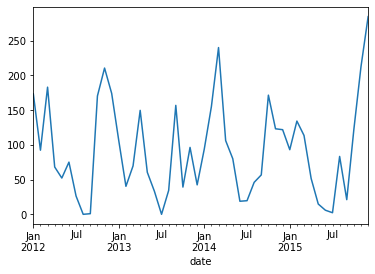

In [21]:
date_df.resample('M').precipitation.sum().plot()

In [22]:
date_df.resample('M').sum()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,173.3,218.7,47.8,120.9
2012-02-29,92.3,269.0,92.9,113.2
2012-03-31,183.0,296.2,88.0,131.7
2012-04-30,68.1,446.2,179.8,101.2
2012-05-31,52.2,547.5,253.9,104.0
2012-06-30,75.1,560.8,314.4,92.5
2012-07-31,26.3,710.1,400.9,89.2
2012-08-31,0.0,801.6,434.3,87.7
2012-09-30,0.9,686.4,337.3,79.4


In [23]:
# Need to redo this, should've done resample like the cell above
by_month

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,1.8,9.4,6.1,3.9,rain
2012-02-29,0.8,5.0,1.1,7.0,snow
2012-03-31,13.2,10.0,2.8,3.4,rain
2012-04-30,4.3,12.8,7.2,8.0,rain
2012-05-31,3.8,17.8,12.2,2.7,rain
2012-06-30,3.0,20.0,13.3,2.4,rain
2012-07-31,0.0,22.8,13.9,2.8,sun
2012-08-31,0.0,22.2,10.6,2.9,sun
2012-09-30,0.0,21.1,7.8,3.1,sun


<AxesSubplot:xlabel='date'>

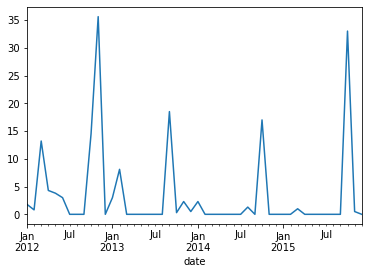

In [24]:
by_month.precipitation.plot()

<AxesSubplot:xlabel='date'>

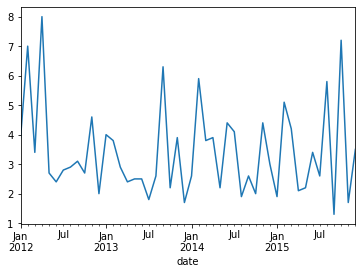

In [25]:
by_month.wind.plot()

In [26]:
# April 2012 was the windiest 
by_month.wind.sort_values(ascending=False)

date
2012-04-30    8.0
2015-10-31    7.2
2012-02-29    7.0
2013-09-30    6.3
2014-02-28    5.9
2015-08-31    5.8
2015-02-28    5.1
2012-11-30    4.6
2014-06-30    4.4
2014-11-30    4.4
2015-03-31    4.2
2014-07-31    4.1
2013-01-31    4.0
2012-01-31    3.9
2014-04-30    3.9
2013-11-30    3.9
2014-03-31    3.8
2013-02-28    3.8
2015-12-31    3.5
2012-03-31    3.4
2015-06-30    3.4
2012-09-30    3.1
2014-12-31    3.0
2013-03-31    2.9
2012-08-31    2.9
2012-07-31    2.8
2012-05-31    2.7
2012-10-31    2.7
2013-08-31    2.6
2014-09-30    2.6
2015-07-31    2.6
2014-01-31    2.6
2013-05-31    2.5
2013-06-30    2.5
2013-04-30    2.4
2012-06-30    2.4
2014-05-31    2.2
2015-05-31    2.2
2013-10-31    2.2
2015-04-30    2.1
2012-12-31    2.0
2014-10-31    2.0
2014-08-31    1.9
2015-01-31    1.9
2013-07-31    1.8
2013-12-31    1.7
2015-11-30    1.7
2015-09-30    1.3
Name: wind, dtype: float64

In [27]:
sunny_days = df[df.weather=='sun']

In [28]:
sunny_days.head()

,date,precipitation,temp_max,temp_min,wind,weather
7,2012-01-08,0.0,10.0,2.8,2.0,sun
10,2012-01-11,0.0,6.1,-1.1,5.1,sun
11,2012-01-12,0.0,6.1,-1.7,1.9,sun
12,2012-01-13,0.0,5.0,-2.8,1.3,sun
32,2012-02-02,0.0,8.3,1.7,2.6,sun


In [29]:
sunny_days['year'] = sunny_days.date.dt.year
sunny_days.head()

,date,precipitation,temp_max,temp_min,wind,weather,year
7,2012-01-08,0.0,10.0,2.8,2.0,sun,2012
10,2012-01-11,0.0,6.1,-1.1,5.1,sun,2012
11,2012-01-12,0.0,6.1,-1.7,1.9,sun,2012
12,2012-01-13,0.0,5.0,-2.8,1.3,sun,2012
32,2012-02-02,0.0,8.3,1.7,2.6,sun,2012


In [30]:
# 2014 was the sunniest year
sunny_days.year.value_counts()

2014    211
2013    205
2015    180
2012    118
Name: year, dtype: int64

In [ ]:
# another way
df.set_index('date').groupby('weather').resample.('Y').size()

In [31]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [32]:
rainy_months = df[df.weather=='rain']
rainy_months.head()

,date,precipitation,temp_max,temp_min,wind,weather
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain


In [33]:
# February is the rainiest
rainy_months['month'] = rainy_months.date.dt.month_name()
rainy_months.month.value_counts()

February     40
March        37
January      35
November     25
December     23
October      20
April        20
June         19
May          16
July         14
August        6
September     4
Name: month, dtype: int64

In [34]:
df['month'] = df.date.dt.month_name()
non_zero = df[df.precipitation!=0]

In [35]:
# December has the most number of days with non-zero amount of precipitation
non_zero.month.value_counts()

December     81
March        73
February     73
November     71
January      66
October      61
April        59
June         37
September    35
May          34
August       22
July         11
Name: month, dtype: int64

#### Flights

In [36]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [37]:
# replace negative values with 0
df.delay.clip(lower=0, inplace=True)

In [38]:
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


In [39]:
df['hour'] = df.date.dt.hour
df.head()

,date,delay,distance,origin,destination,hour
0,2001-01-13 14:56:00,32,417,SAN,SJC,14
1,2001-01-31 16:40:00,0,1093,FLL,ISP,16
2,2001-02-11 18:39:00,3,293,LBB,DAL,18
3,2001-01-10 21:00:00,0,550,MSY,MCO,21
4,2001-03-30 21:45:00,0,229,STL,IND,21


In [40]:
# Hour 3 had the longest average delay
df.groupby('hour',as_index=False)['delay'].mean().sort_values(by='delay',ascending=False)

,hour,delay
2,3,302.500000
1,1,170.000000
0,0,127.916667
21,23,65.353846
20,22,32.704607
19,21,21.626768
18,20,17.889778
17,19,16.256557
16,18,14.514218
14,16,13.881068


In [41]:
# Friday has the longest average delay
df['day'] = df.date.dt.day_name()
df.groupby('day', as_index=False)['delay'].mean().sort_values(by='delay',ascending=False)

,day,delay
0,Friday,17.757596
4,Thursday,12.821322
6,Wednesday,11.032478
3,Sunday,10.413542
5,Tuesday,9.410866
2,Saturday,8.431498
1,Monday,7.165772


In [42]:
# February has the longest average delay
df['month'] = df.date.dt.month_name()
df.groupby('month', as_index=False)['delay'].mean().sort_values(by='delay',ascending=False)

,month,delay
0,February,12.306106
1,January,11.301592
2,March,9.875287


### Iowa Electricity

In [43]:
df = data.iowa_electricity()
df

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
5,2006-01-01,Fossil Fuels,37014
6,2007-01-01,Fossil Fuels,41389
7,2008-01-01,Fossil Fuels,42734
8,2009-01-01,Fossil Fuels,38620
9,2010-01-01,Fossil Fuels,42750


In [44]:
fossil_fuels_df = df[df.source=='Fossil Fuels']

In [45]:
nuclear_df = df[df.source=='Nuclear Energy']

In [46]:
renewables_df = df[df.source=='Renewables']

In [47]:
df = pd.merge(pd.merge(fossil_fuels_df,nuclear_df,on='year'),renewables_df,on='year')

In [48]:
df.head()

,year,source_x,net_generation_x,source_y,net_generation_y,source,net_generation
0,2001-01-01,Fossil Fuels,35361,Nuclear Energy,3853,Renewables,1437
1,2002-01-01,Fossil Fuels,35991,Nuclear Energy,4574,Renewables,1963
2,2003-01-01,Fossil Fuels,36234,Nuclear Energy,3988,Renewables,1885
3,2004-01-01,Fossil Fuels,36205,Nuclear Energy,4929,Renewables,2102
4,2005-01-01,Fossil Fuels,36883,Nuclear Energy,4538,Renewables,2724


In [49]:
df['total'] = df.net_generation_x + df.net_generation_y + df.net_generation
df.head()

,year,source_x,net_generation_x,source_y,net_generation_y,source,net_generation,total
0,2001-01-01,Fossil Fuels,35361,Nuclear Energy,3853,Renewables,1437,40651
1,2002-01-01,Fossil Fuels,35991,Nuclear Energy,4574,Renewables,1963,42528
2,2003-01-01,Fossil Fuels,36234,Nuclear Energy,3988,Renewables,1885,42107
3,2004-01-01,Fossil Fuels,36205,Nuclear Energy,4929,Renewables,2102,43236
4,2005-01-01,Fossil Fuels,36883,Nuclear Energy,4538,Renewables,2724,44145


In [50]:
df['ff_percentage'] = round((df.net_generation_x / df.total),2)
df['nuclear_percentage'] = round((df.net_generation_y / df.total),2)
df['renewable_percentage'] = round((df.net_generation / df.total),2)

In [51]:
df.head()

,year,source_x,net_generation_x,source_y,net_generation_y,source,net_generation,total,ff_percentage,nuclear_percentage,renewable_percentage
0,2001-01-01,Fossil Fuels,35361,Nuclear Energy,3853,Renewables,1437,40651,0.87,0.09,0.04
1,2002-01-01,Fossil Fuels,35991,Nuclear Energy,4574,Renewables,1963,42528,0.85,0.11,0.05
2,2003-01-01,Fossil Fuels,36234,Nuclear Energy,3988,Renewables,1885,42107,0.86,0.09,0.04
3,2004-01-01,Fossil Fuels,36205,Nuclear Energy,4929,Renewables,2102,43236,0.84,0.11,0.05
4,2005-01-01,Fossil Fuels,36883,Nuclear Energy,4538,Renewables,2724,44145,0.84,0.10,0.06


In [52]:
df.to_csv('iowa_electricity.csv')

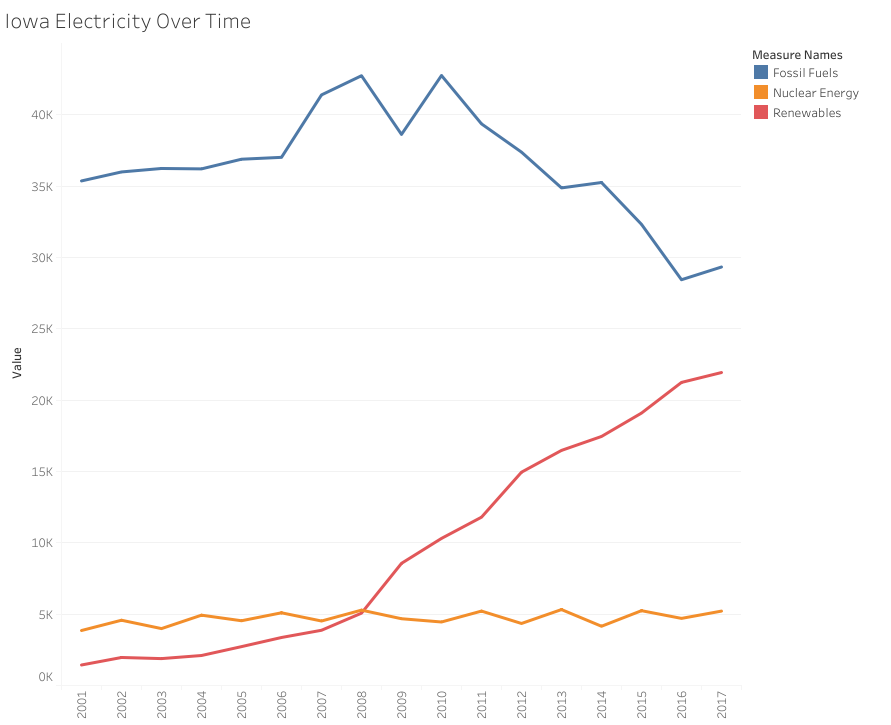

In [53]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
year,2001-01-01 00:00:00,2002-01-01 00:00:00,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00
source_x,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels
net_generation_x,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
source_y,Nuclear Energy,Nuclear Energy,Nuclear Energy,Nuclear Energy,Nuclear Energy,Nuclear Energy,Nuclear Energy,Nuclear Energy,Nuclear Energy,Nuclear Energy,Nuclear Energy,Nuclear Energy,Nuclear Energy,Nuclear Energy,Nuclear Energy,Nuclear Energy,Nuclear Energy
net_generation_y,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
source,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables
net_generation,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933
total,40651,42528,42107,43236,44145,45473,49778,53086,51859,57509,56371,56675,56670,56854,56653,54381,56476
ff_percentage,0.87,0.85,0.86,0.84,0.84,0.81,0.83,0.8,0.74,0.74,0.7,0.66,0.62,0.62,0.57,0.52,0.52
nuclear_percentage,0.09,0.11,0.09,0.11,0.1,0.11,0.09,0.1,0.09,0.08,0.09,0.08,0.09,0.07,0.09,0.09,0.09


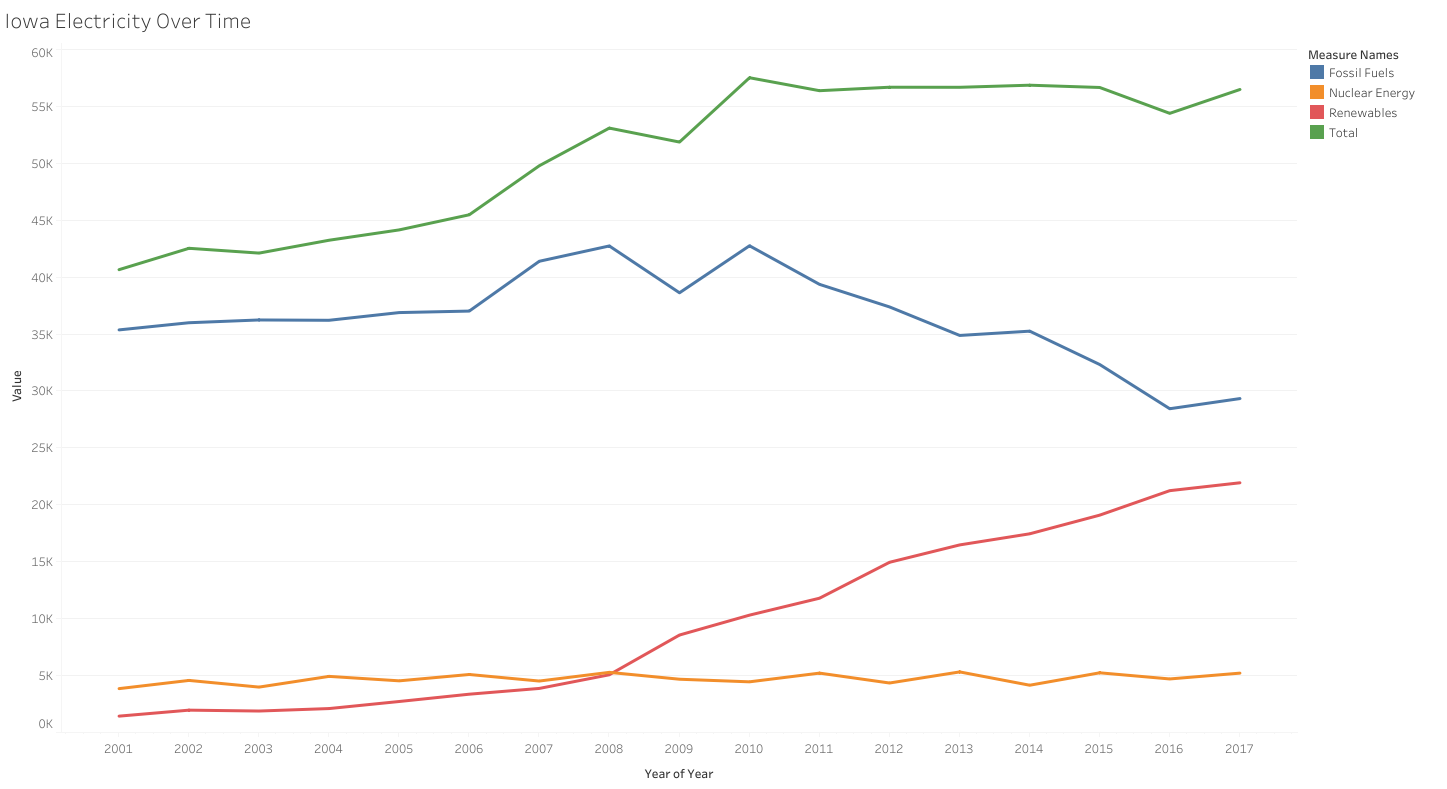